In [20]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('CONVICTIONLISTTOPN_BSLD-408.csv',header=None)
df.rename(columns={1: "time", 2: "number", 3: "code", 4: "type", 5: "mer", 6: "value"}, inplace=True)

data = pd.read_csv('zwroty (1).csv')
data.columns = ["time", "code", "return2"]
sl_score = {}

for lab, row in df.iterrows():
    sl_score[row["time"]] = {}
    if "." in row["code"]:
      znak_z_x = row["code"]
      indeks_znaku = znak_z_x.index(".")
      row["code"] = znak_z_x[0:indeks_znaku]

    sl_score[row["time"]][row["code"]] = row["value"]

df2 = pd.merge(data, df, on=['time','code'])
print(df2)






             time   code   return2  \
0      2004-02-11    GGG  0.055986   
1      2004-02-11    CWT  0.080367   
2      2004-02-11    BLL  0.015843   
3      2004-02-11    APA  0.052312   
4      2004-02-11   MATX  0.077529   
...           ...    ...       ...   
29649  2022-02-09   SLGN -0.024445   
29650  2022-02-09    PEP -0.020117   
29651  2022-02-09    GEF -0.037857   
29652  2022-02-09    DPZ -0.015887   
29653  2022-02-09  LIFZF  0.086517   

                                                       0 number  \
0      10:01:54.481 77425 [77425-thread-2] INFO  a.s....    GGG   
1      10:01:54.481 77425 [77425-thread-2] INFO  a.s....    CWT   
2      10:01:54.481 77425 [77425-thread-2] INFO  a.s....    BLL   
3      10:01:54.481 77425 [77425-thread-2] INFO  a.s....    APA   
4      10:01:54.481 77425 [77425-thread-2] INFO  a.s....   MATX   
...                                                  ...    ...   
29649  10:27:03.049 77425 [77425-thread-2] INFO  a.s....   SLGN   
29650  

In [10]:
df2.head()

,time,code,return2,0,number,type,mer,value
0,2004-02-11,GGG,0.055986,10:01:54.481 77425 [77425-thread-2] INFO a.s....,GGG,Producer Manufacturing,H5490W-R,0.952753
1,2004-02-11,CWT,0.080367,10:01:54.481 77425 [77425-thread-2] INFO a.s....,CWT,Utilities,GSWXLY-R,0.934181
2,2004-02-11,BLL,0.015843,10:01:54.481 77425 [77425-thread-2] INFO a.s....,BLL,Process Industries,VFT0VQ-R,0.922862
3,2004-02-11,APA,0.052312,10:01:54.481 77425 [77425-thread-2] INFO a.s....,APA,Energy Minerals,DMX4QY-R,0.912117
4,2004-02-11,MATX,0.077529,10:01:54.481 77425 [77425-thread-2] INFO a.s....,MATX,Transportation,QVP8YX-R,0.866946


In [11]:
df2.describe()

,return2,value
count,29654.000000,29654.000000
mean,0.003157,0.731638
std,0.042820,0.117660
min,-0.375000,0.413554
25%,-0.016437,0.653762
50%,0.002551,0.742125
75%,0.022472,0.813962
max,1.000000,0.987225


In [12]:
dataset = df2[['value','number','type','return2']]
dataset.head(10)

,value,number,type,return2
0,0.952753,GGG,Producer Manufacturing,0.055986
1,0.934181,CWT,Utilities,0.080367
2,0.922862,BLL,Process Industries,0.015843
3,0.912117,APA,Energy Minerals,0.052312
4,0.866946,MATX,Transportation,0.077529
5,0.864789,ROST,Retail Trade,0.097474
6,0.861478,AXL,Producer Manufacturing,0.066872
7,0.860105,BRO,Finance,0.017489
8,0.853750,GFF,Producer Manufacturing,0.063433
9,0.850025,HUBB,Producer Manufacturing,0.021200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0de3d37390>,
      dtype=object)

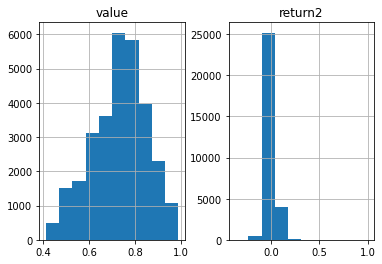

In [13]:
x = dataset[['value','return2']]
x.hist()

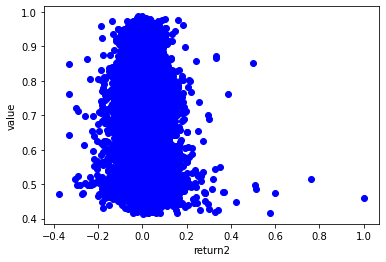

In [14]:
plt.scatter(dataset['return2'], dataset['value'],  color='blue')
plt.xlabel("return2")
plt.ylabel("value")
plt.show()

In [15]:
split = int(0.8 * len(df2)) #800
train = dataset[:split] # 1-799
test = dataset[split:]

In [16]:
train

,value,number,type,return2
0,0.952753,GGG,Producer Manufacturing,0.055986
1,0.934181,CWT,Utilities,0.080367
2,0.922862,BLL,Process Industries,0.015843
3,0.912117,APA,Energy Minerals,0.052312
4,0.866946,MATX,Transportation,0.077529
...,...,...,...,...
23718,0.554994,MUSA,Retail Trade,0.003151
23719,0.553800,RHI,Commercial Services,0.007886
23720,0.552407,DOV,Producer Manufacturing,0.018075
23721,0.548066,KBAL,Consumer Durables,-0.065970


In [17]:
test

,value,number,type,return2
23723,0.547312,HNI,Producer Manufacturing,-0.011887
23724,0.544391,PKG,Process Industries,0.023274
23725,0.543919,GPI,Retail Trade,0.005862
23726,0.541631,CDNTF,Retail Trade,0.000000
23727,0.539470,GIB,Technology Services,0.013352
...,...,...,...,...
29649,0.709506,SLGN,Process Industries,-0.024445
29650,0.701507,PEP,Consumer Non-Durables,-0.020117
29651,0.697954,GEF,Process Industries,-0.037857
29652,0.697741,DPZ,Consumer Services,-0.015887


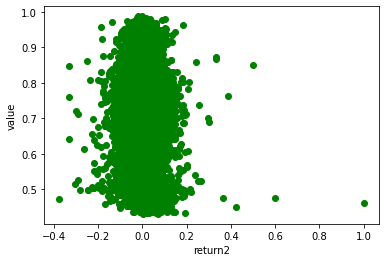

In [18]:
plt.scatter(train.return2, train.value,  color='green')
plt.xlabel("return2")
plt.ylabel("value")
plt.show()

In [19]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x = train[['return2']].values
train_y = train[['value']].values
regr.fit (train_x, train_y)

# The coefficients of the model
print (f'Coefficients: {regr.coef_}')
print (f'Intercept: {regr.intercept_}')

Coefficients: [[-0.06440001]]
Intercept: [0.74697731]
